In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

### Paragraph 1 : Intro

Example 1: mean 

$$
\bar{t} = \frac{\sum_{i=1}^n t_i}{n}
$$

In [10]:
t = [6.9, 6.7, 7, 7.2, 6.8]


In [14]:
t_np = np.array(t)
np.mean(t_np)

np.float64(6.92)

In [13]:
mean_value = statistics.mean(t)
mean_value

6.92

Example 2:
weighted mean
$$
\bar{x} = \frac{\sum_{i=1}^n x_i N_i }{\sum_{i=1}^n N_i}
$$

In [16]:
x = np.array([2, 3, 4, 5])
N = np.array([5, 10, 7, 3])

weighted_mean = np.sum(x * N) / np.sum(N)
print(weighted_mean)


3.32


In [17]:
np.average(x, weights=N)

np.float64(3.32)

In [18]:
x = [2, 3, 4, 5]
N = [5, 10, 7, 3]

weighted_mean = sum(x_i * n_i for x_i, n_i in zip(x, N)) / sum(N)
print(weighted_mean)

3.32


Example 3.1

In [21]:
potato = np.array([147, 145, 155])
np.mean(potato)

np.float64(149.0)

Example 3.2

| Area | Square | Profit |
|:-----|:-----: |-----:|
| A    | 139.8  | 147  |
| B    | 102.34 | 145  |
| C    | 63.29  | 155  |


In [25]:
data = {
    "area": ["A", "B", "C"],
    "square": [139.8, 102.34, 63.29],
    "profit": [147, 145, 155]
}

df = pd.DataFrame(data)
weighted_avg = (df["profit"] * df["square"]).sum() / df["square"].sum()
print(weighted_avg)


147.98759126477427


### Paragraph 2 : Discrete Frequency Distribution

$$
W_i = \frac{N_i}{N}
$$

$$
w_i = \frac{n_i}{n}
$$

$$
n = n_1 + n_2 + ... + n_k
$$

$$
w_1 + w_2 + ... + w_k = 1
$$

In [30]:
x_i = np.array([2, 3, 4, 5])
n_i = np.array([5, 10, 7, 3])
n = sum(n_i)

In [32]:
freq = n_i / n 
freq

array([0.2 , 0.4 , 0.28, 0.12])

Example 4

In [88]:
# raw data to dictionary

data = [4, 5, 6, 4, 4, 2, 3, 5, 4, 4, 5, 2, 3, 3, 4, 5, 5, 2, 3, 6, 5, 4, 6, 4, 3]

dict_data = {}

for elem in data:
    if not elem in dict_data.keys():
        dict_data[elem] = 1
    else:
        dict_data[elem] += 1

pd_data = {
    "x": [],
    "n": []
}

for k in dict_data.keys():
    pd_data['x'].append(k)
    pd_data['n'].append(dict_data[k])


df = pd.DataFrame(pd_data).sort_values('x')

In [89]:
df

,x,n
3,2,3
4,3,5
0,4,8
1,5,6
2,6,3


In [138]:
# raw data directly to pandas 

data = [4, 5, 6, 4, 4, 2, 3, 5, 4, 4, 5, 2, 3, 3, 4, 5, 5, 2, 3, 6, 5, 4, 6, 4, 3]
df = pd.DataFrame(data, columns=['value'])
df_freq = df.groupby('value').agg(
        frequency=('value', 'count')
    ).reset_index()

df_freq['relative_frequency'] = df_freq['frequency'] / len(data)

In [139]:
df_freq

,value,frequency,relative_frequency
0,2,3,0.12
1,3,5,0.20
2,4,8,0.32
3,5,6,0.24
4,6,3,0.12


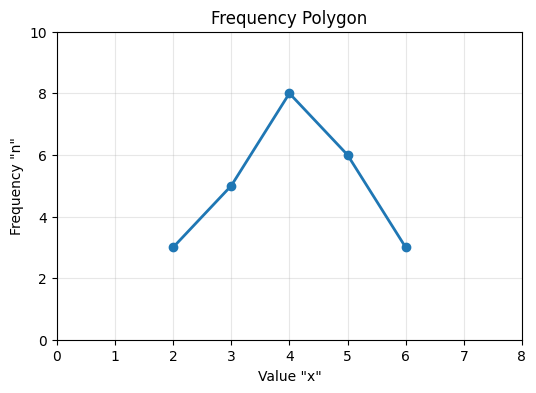

In [140]:
plt.figure(figsize=(6,4))
plt.plot(df_freq.value, df_freq.frequency, marker='o', linewidth=2)
plt.grid(True, alpha=0.3)

plt.xlabel('Value "x"')
plt.ylabel('Frequency "n"')
plt.title('Frequency Polygon')

plt.ylim([0, max(df_freq.frequency)+2])
plt.xlim([0, max(df_freq.value)+2])
plt.show()

In [141]:
#sum check
print(df_freq.frequency.sum())
print(df_freq.relative_frequency.sum())

25
1.0


Empirical Distribution Function

$$
F(x) = \frac{n_x}{n},
$$

n_x - number of values less than x

$$
x \in \left(-\infty;2 \right] :  F(x) = 0
$$

$$
x \in \left(2; 3 \right] :  F(x) = \frac{n_x}{n} = \frac{n_1}{n} = w_1 = 0.12
$$

$$
x \in \left(3; 4 \right] :  F(x) = \frac{n_x}{n} = \frac{n_1 + n_2}{n} = w_1 + w_2 = 0.32
$$

$$
x \in \left(4; 5 \right] :  F(x) = \frac{n_x}{n} = \frac{n_1 + n_2 + n_3}{n} = w_1 + w_2 + w_3 = 0.64
$$

$$
x \in \left(5; 6 \right] :  F(x) = \frac{n_x}{n} = \frac{n_1 + n_2 + n_3 + n_4}{n} = w_1 + w_2 + w_3 + w_4 = 0.88
$$

$$
x \in \left(6; + \infty \right) :  F(x) = \frac{n_x}{n} = \frac{n_1 + n_2 + n_3 + n_4}{n} = w_1 + w_2 + w_3 + w_4 + w_5 = 1
$$

In [142]:
df_freq['edf'] = df_freq['relative_frequency'].cumsum()

In [143]:
df_freq

,value,frequency,relative_frequency,edf
0,2,3,0.12,0.12
1,3,5,0.20,0.32
2,4,8,0.32,0.64
3,5,6,0.24,0.88
4,6,3,0.12,1.00


In [145]:
df_plot = df_freq.copy()
df_plot.loc[-1] = [10, 0, 0, 1] 
df_plot.loc[-2] = [0, 0, 0, 0] 
df_plot.index = df_plot.index + 1  
df_plot = df_plot.sort_values('value')

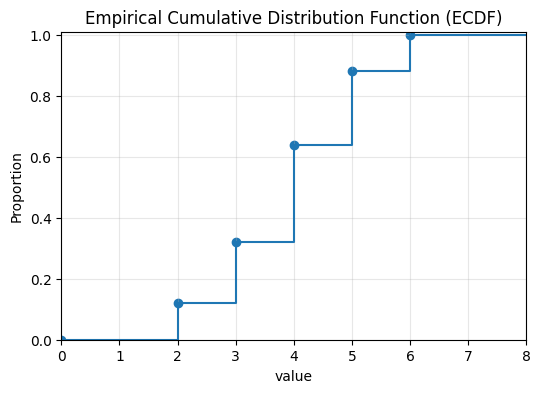

In [146]:
plt.figure(figsize=(6,4))
plt.step(df_plot.value, df_plot.edf, where='post')
plt.scatter(df_plot.value, df_plot.edf)
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.xlabel('value')
plt.ylabel('Proportion')
plt.grid(True, alpha=0.3)
plt.xlim(0, 8)
plt.ylim(0, 1.01)
plt.show()


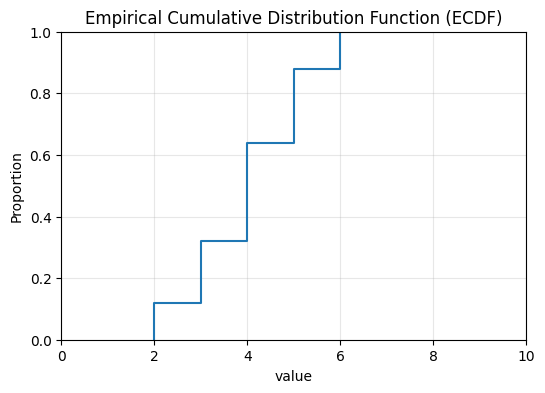

In [147]:
# embedded seaborn function
plt.figure(figsize=(6,4))
sns.ecdfplot(data=df, x="value")
plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.grid(True, alpha=0.3)
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.show()

Example 5

In [151]:
x_i = np.array([-2, 1.5, 5, 7])
n_i = np.array([12, 8, 20, 10])
n = sum(n_i)
w_i = n_i / n
cum_freq = np.cumsum(w_i)

x = np.insert(x_i, 0, x_i[0])
y = np.insert(cum_freq, 0, 0)

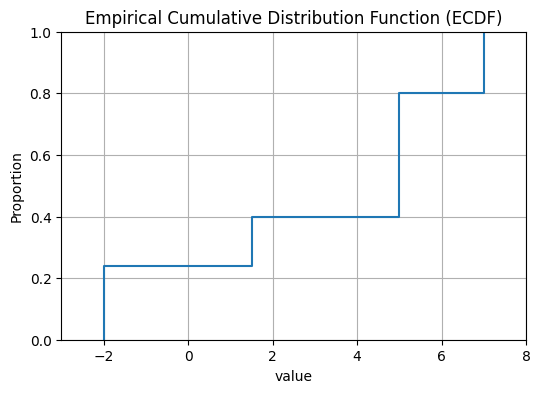

In [156]:
plt.figure(figsize=(6, 4))
plt.step(x, y, where='post')  
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.xlabel('value')
plt.ylabel('Proportion')
plt.xlim(x_i.min()-1, x_i.max()+1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


### Paragraph 3 : Grouped (Interval) Frequency Distribution

Example 6

Given various prices of some product:

In [11]:
price_data = [7.5, 6.1, 7, 6, 7.4, 6.8, 6.3, 7.5, 7, 7.5,
             7.6, 10.6, 6, 8.2, 7.1, 9.6, 8.5, 9.2, 8, 8,
             8.7, 9.8, 8.3, 8.5, 9.5, 6.3, 5.8, 7.2, 7.5, 6.5]
len(price_data)

30

Range:

In [12]:
price_range = max(price_data) - min(price_data)
print('the length of the total interval within which the price varies:', price_range)

the length of the total interval within which the price varies: 4.8


Divide into class intervals with Sturges’ formula - it gives the optimal number of intervals for the data based on its length

In [14]:
k = 1 + 3.322*math.log10(len(price_data))
int(k)

5

Equal-Interval Grouping: gives the length of a single interval

In [34]:
h = price_range / int(k)
h

0.96

Let's assume the length of a interval to be `h = 1`

In [38]:

overload_correction = (1 - h) * int(k) / 2
h_new = 1
interval_beg = np.arange(min(price_data) - overload_correction, max(price_data) + overload_correction, h_new)
interval_mid = (interval_beg + (interval_beg + h_new)) / 2


In [39]:
interval_beg

array([5.7, 6.7, 7.7, 8.7, 9.7])

In [40]:
interval_mid

array([ 6.2,  7.2,  8.2,  9.2, 10.2])

In [53]:
frequencies = np.array([0]*len(interval_beg))
for price in price_data:
    for i in range(len(interval_beg)):
        if interval_beg[i] <= price < interval_beg[i] + h_new:
            frequencies[i] += 1
            break
    

In [54]:
frequencies

array([ 7, 11,  6,  4,  2])

Frequency Density

$$
\frac{n_i}{h_i}
$$

In [56]:
freq_dens = frequencies / h_new
freq_dens

array([ 7., 11.,  6.,  4.,  2.])

Relative frequencies

$$
w_i = \frac{n_i}{n}
$$

In [57]:
freq_rel = frequencies / len(price_data)
freq_rel

array([0.23333333, 0.36666667, 0.2       , 0.13333333, 0.06666667])

Relative frequencies dencities 

$$
\frac{w_i}{h_i}
$$

In [58]:
freq_rel_dens = freq_rel / h_new
freq_rel_dens

array([0.23333333, 0.36666667, 0.2       , 0.13333333, 0.06666667])

**Frequency histogram**

ox: interval length

oy: frequency density

<BarContainer object of 5 artists>

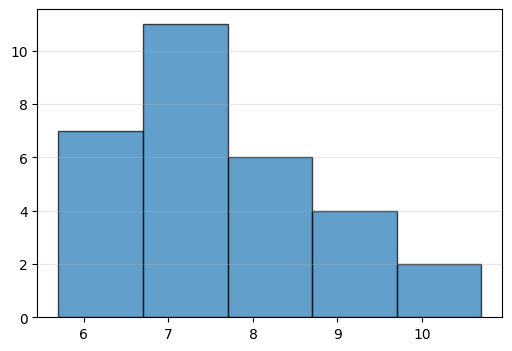

In [66]:
plt.figure(figsize=(6,4))
plt.grid(axis='y', alpha=0.3)
plt.bar(interval_beg, freq_dens, width=1, align='edge', edgecolor='black', alpha=0.7)

ox: interval length

oy: Relative frequency density

<BarContainer object of 5 artists>

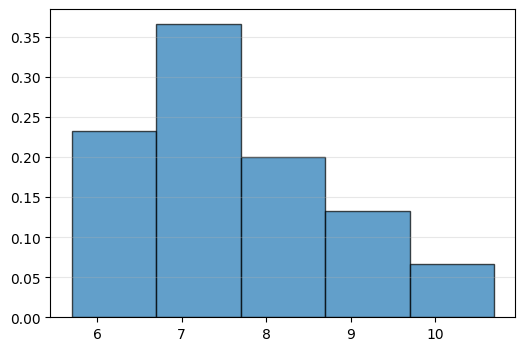

In [65]:
plt.figure(figsize=(6,4))
plt.grid(axis='y', alpha=0.3)
plt.bar(interval_beg, freq_rel_dens, width=1, align='edge', edgecolor='black', alpha=0.7)

Histogram plot from matplotlib based on raw data:

(array([ 7., 11.,  6.,  4.,  2.]),
 array([ 5.8 ,  6.76,  7.72,  8.68,  9.64, 10.6 ]),
 <BarContainer object of 5 artists>)

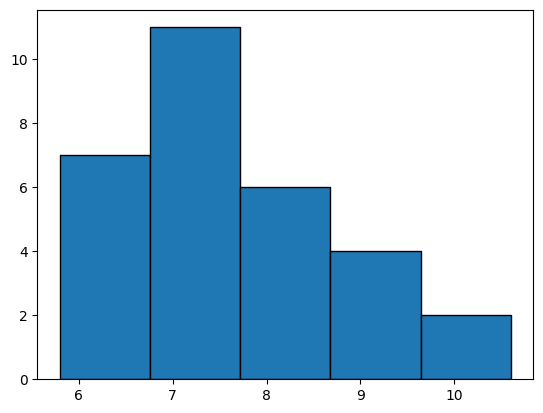

In [78]:
plt.hist(price_data, edgecolor='black', bins=5)

Relative Frequency Polygon


$(x_i, w_i)$, where $x_i$- middle of the i-interval

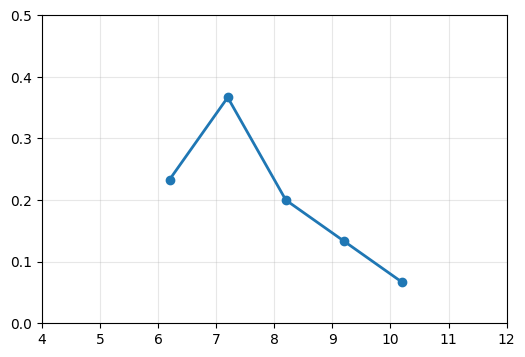

In [83]:
plt.figure(figsize=(6,4))
plt.plot(interval_mid, freq_rel, marker='o', linewidth=2)
plt.grid(True, alpha=0.3)
plt.ylim(0, 0.5)
plt.xlim(4, 12)
plt.show()

Empirical Cumulative Distribution Function

In [107]:
ecdf = np.cumsum(freq_rel)
interval_right = interval_beg + h_new


ecdf_plot = np.concatenate([[0], [0], ecdf, [1]])
interval_right_plot = np.concatenate([[0], [interval_beg[0]], interval_right, [100]])

(4.0, 12.0)

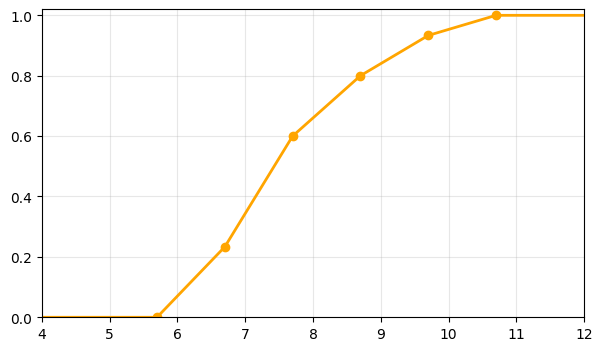

In [110]:
plt.figure(figsize=(7,4))
plt.plot(interval_right_plot, ecdf_plot, marker='o', linewidth=2, color='orange')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.02)
plt.xlim(4, 12)

Example 7

In [136]:
data = {
    "weight": [(47, 49), (49, 50), (50, 51), (51, 53)],
    "quantity": [20, 50, 20, 10]
}

df = pd.DataFrame(data)

df['h'] = df['weight'].apply(lambda x: x[1] - x[0])
df['mid'] = df['weight'].apply(lambda x: (x[1] + x[0])/2)
n = df.quantity.sum()
df['w'] = df['quantity'] / n
df['density'] = df['w']/df['h']
df['w_cum'] = df.w.cumsum()

df['left_border'] = df['weight'].apply(lambda x: x[0])
df['right_border'] = df['weight'].apply(lambda x: x[1])

In [137]:
df

,weight,quantity,h,mid,w,density,w_cum,left_border,right_border
0,"(47, 49)",20,2,48.0,0.2,0.10,0.2,47,49
1,"(49, 50)",50,1,49.5,0.5,0.50,0.7,49,50
2,"(50, 51)",20,1,50.5,0.2,0.20,0.9,50,51
3,"(51, 53)",10,2,52.0,0.1,0.05,1.0,51,53


**Frequency histogram**

ox: interval length

oy: frequency density

<BarContainer object of 4 artists>

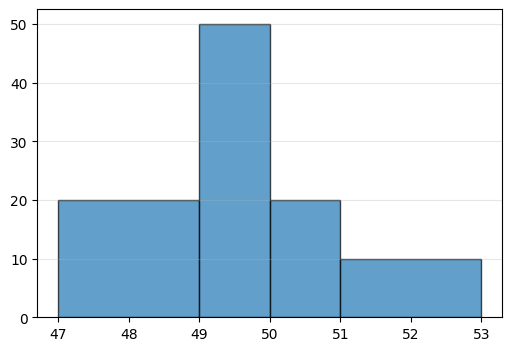

In [139]:
plt.figure(figsize=(6,4))
plt.grid(axis='y', alpha=0.3)
plt.bar(df['left_border'], df['quantity'], width=df['h'], align='edge', edgecolor='black', alpha=0.7)

Relative Frequency Polygon

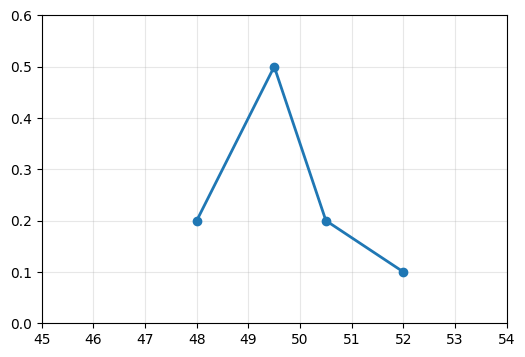

In [141]:
plt.figure(figsize=(6,4))
plt.plot(df.mid, df.w, marker='o', linewidth=2)
plt.grid(True, alpha=0.3)
plt.ylim(0, 0.6)
plt.xlim(45, 54)
plt.show()

Empirical Cumulative Distribution Function


In [146]:
df.left_border[0]

np.int64(47)

In [158]:
plot_data_x = np.array(df.right_border)
plot_data_x = np.concatenate([[44], [df.left_border[0]], plot_data_x, [55]])

plot_data_y = np.array(df.w_cum)
plot_data_y = np.concatenate([[0], [0], plot_data_y, [1]])

In [159]:
plot_data_x

array([44, 47, 49, 50, 51, 53, 55])

In [160]:
plot_data_y

array([0. , 0. , 0.2, 0.7, 0.9, 1. , 1. ])

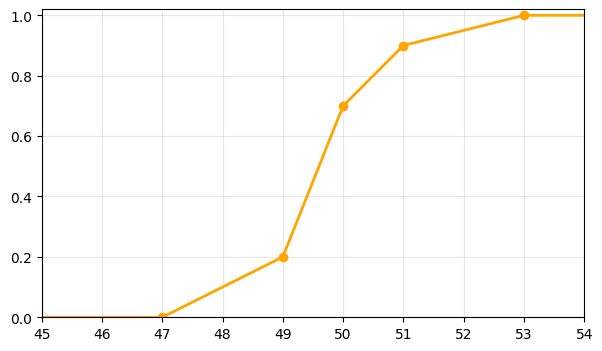

In [162]:
plt.figure(figsize=(7,4))
plt.plot(plot_data_x, plot_data_y, marker='o', linewidth=2, color='orange')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.02)
plt.xlim(45, 54)
plt.show()

### Paragraph 4. Mode, Median, Population Mean and Sample Mean

Population Mean:
$$
\bar{x_r} = \frac{x_1 + x_2 + ... + x_N}{N} = \frac{\sum_{i=1}^N x_i}{N}
$$

if $x_i$ repeats $N_i$ times:

$$
\bar{x_r} = \frac{x_1 N_1 + x_2 N_2 + ... + x_K N_K}{N} =\frac{\sum_{i=1}^K x_i N_i }{N}
$$

Sample Mean:

$$
\bar{x_e} = \frac{x_1 + x_2 + ... + x_n}{n} = \frac{\sum_{i=1}^n x_i}{n}
$$

if $x_i$ repeats $n_i$ times:

$$
\bar{x_e} = \frac{x_1 n_1 + x_2 n_2 + ... + x_k n_k}{n} =\frac{\sum_{i=1}^k x_i n_i }{n}
$$

Example 8 (data from example 4)

In [191]:
data = [4, 5, 6, 4, 4, 2, 3, 5, 4, 4, 5, 2, 3, 3, 4, 5, 5, 2, 3, 6, 5, 4, 6, 4, 3]
df = pd.DataFrame(data, columns=['value'])
df_freq = df.groupby('value').agg(
        frequency=('value', 'count')
    ).reset_index()

df_freq['relative_frequency'] = df_freq['frequency'] / len(data)
df_freq['edf'] = df_freq['relative_frequency'].cumsum()

In [192]:
df_freq

,value,frequency,relative_frequency,edf
0,2,3,0.12,0.12
1,3,5,0.20,0.32
2,4,8,0.32,0.64
3,5,6,0.24,0.88
4,6,3,0.12,1.00


In [171]:
direct_mean = sum(data) / len(data)
print(direct_mean)

4.04


In [177]:
mean = (df_freq.value * df_freq.frequency).sum() / (df_freq.frequency).sum()
print(mean)

4.04


Mode

In [179]:
df_freq.loc[df_freq.frequency == df_freq.frequency.max()]

,value,frequency,relative_frequency
2,4,8,0.32


Median

In [181]:
statistics.median(data)

4

In [182]:
sorted(data)

[2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6]

In [190]:
sorted(data)[int((len(data) / 2))]

4

In [196]:
df_freq[df_freq.edf >= 0.5].iloc[0].value

np.float64(4.0)

Example 9 

In [385]:
data = {
    "button_number": [1, 2, 3, 4, 5],
    "sales_number": [225, 32, 82, 145, 16]
}
df = pd.DataFrame(data)
n = sum(df.sales_number)

df['relative_frequency'] = df['sales_number'] / n
df['edf'] = df['relative_frequency'].cumsum()
df['sales_cumsum'] = df['sales_number'].cumsum()

In [386]:
df

,button_number,sales_number,relative_frequency,edf,sales_cumsum
0,1,225,0.450,0.450,225
1,2,32,0.064,0.514,257
2,3,82,0.164,0.678,339
3,4,145,0.290,0.968,484
4,5,16,0.032,1.000,500


In [387]:
mean = sum(df.button_number * df.sales_number) / n
mode = df.loc[df.sales_number == df.sales_number.max()]['button_number'].iloc[0]
median = df[df.edf >= 0.5].iloc[0].sales_cumsum

In [388]:
print(f"Mean: {mean}\nMode: {mode}\nMedian: {median}")

Mean: 2.39
Mode: 1
Median: 257.0


Example 10 (data from example 6)

In [389]:
price_data = sorted([7.5, 6.1, 7, 6, 7.4, 6.8, 6.3, 7.5, 7, 7.5,
             7.6, 10.6, 6, 8.2, 7.1, 9.6, 8.5, 9.2, 8, 8,
             8.7, 9.8, 8.3, 8.5, 9.5, 6.3, 5.8, 7.2, 7.5, 6.5])
mean = sum(price_data) / len(price_data)

half_volume = len(price_data) // 2

if len(price_data)%2==0:
    median = (price_data[half_volume] + price_data[half_volume + 1]) / 2
else:
    median = price_data[half_volume + 1]


In [390]:
print(f"Calculations from raw data\nMean: {mean}\nMedian: {median}")

Calculations from raw data
Mean: 7.666666666666667
Median: 7.5


In case there is no raw data, only some interval frequencies:

In [391]:
data = {
    "left_border": [5.7, 6.7, 7.7, 8.7, 9.7],
    "right_border": [6.7, 7.7, 8.7, 9.7, 10.7],
    "n":[7, 11, 6, 4, 2]
}
df = pd.DataFrame(data)



To find the mean value we have to calculate the middles of the intervals.

And then use the formula for the discrete case

$$
\bar{x_e} = \frac{x_1 n_1 + x_2 n_2 + ... + x_k n_k}{n} =\frac{\sum_{i=1}^k x_i n_i }{n}
$$

In [392]:
df['mid'] = (df['right_border'] + df['left_border']) / 2
df['cumsum'] = df.n.cumsum()

mean = sum(df.mid * df.n) / sum(df.n)


In order to find mode, we need to define the modal class interval (with the maximum frequency), and previous and next intervals relatively to it

In [393]:
# modal class interval
modal_interval = df[df.n==df.n.max()]
h = (modal_interval['right_border'] - modal_interval['left_border']).iloc[0]
freq = modal_interval.n.iloc[0]
x0 = modal_interval.left_border.iloc[0]
freq_next = df.at[modal_interval.index[0] + 1, 'n']
freq_prev = df.at[modal_interval.index[0] - 1, 'n']



$$
M_0 = x_0 + \frac{n_M - n_{M-1}}{(n_M - n_{M-1}) + (n_M - n_{M+1})} h
$$

where $x_0$ - left border of the modal interval;

$h$ - length of modal interval;

$n_M$ - frequency of modal interval

$n_{M - 1}$ - frequency of previous interval

$n_{M + 1}$ - frequency of next interval

In [395]:
mode = x0 + (freq - freq_prev)*h / ((freq - freq_prev) + (freq - freq_next))

In [396]:
half_volume = len(price_data) // 2

Median from the interval data - first, we need to find median interval (the interval in which values 15 and 16 are - (6,7; 7,7)) - we look at the cumulative sum of the n.

Formula of the median:

$$
m_e = x_0 + \frac{0.5n - n_{m-1}'}{n_m} h
$$

where
$n$ - volume of the data 

where $x_0$ - left border of the modal interval;

$h$ - length of median interval; 

$n_m$ - frequency of median interval; 
$n_{m-1}'$ - accumulated frequency of the previous median interval

$$
m_e = 6.7 + \frac{0.5\times30 - 7}{11} 1
$$

In [398]:
median_interval = df[df['cumsum']>=half_volume+1].head(1)
n = sum(df.n)
h = (median_interval['right_border'] - median_interval['left_border']).iloc[0]
x0 = median_interval.left_border.iloc[0]
freq = median_interval.n.iloc[0]
freq_prev = df.at[median_interval.index[0] - 1, 'cumsum']
median = x0 + (0.5*n-freq_prev)*h/freq

In [399]:
print(f"Calculations from interval data\nMean: {mean}\nMode: {mode}\nMedian: {median}")

Calculations from interval data
Mean: 7.633333333333334
Mode: 7.144444444444445
Median: 7.427272727272728


In [400]:
df['rel_freq'] = df['n'] / (n * (df['right_border'] - df['left_border']))

In [401]:
df

,left_border,right_border,n,mid,cumsum,rel_freq
0,5.7,6.7,7,6.2,7,0.233333
1,6.7,7.7,11,7.2,18,0.366667
2,7.7,8.7,6,8.2,24,0.200000
3,8.7,9.7,4,9.2,28,0.133333
4,9.7,10.7,2,10.2,30,0.066667


Histograms with mode and median

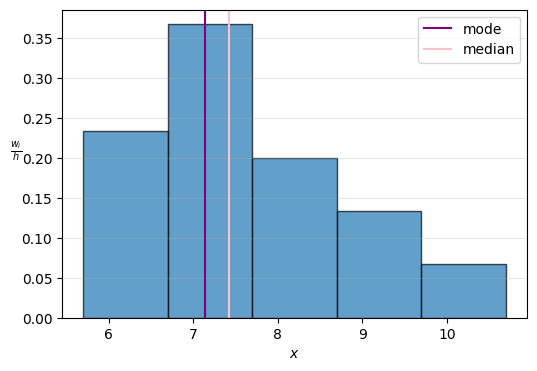

In [402]:

plt.figure(figsize=(6,4))
plt.grid(axis='y', alpha=0.3)
plt.bar(df.left_border, df['rel_freq'], width=h, align='edge', edgecolor='black', alpha=0.7)
plt.axvline(mode, color='purple', label='mode')
plt.axvline(median, color='pink', label='median')
plt.xlabel(r'$x$')
plt.ylabel(r'$\frac{w_i}{h}$', rotation=0)
plt.legend()
plt.show()

Example 11

In [403]:
data = {
    "left_border": [16, 20, 24, 28, 32],
    "right_border": [20, 24, 28, 32, 36],
    "n":[10, 20, 50, 15, 5]
}
df = pd.DataFrame(data)

In [404]:
df['h'] = df['right_border'] - df['left_border']
df['mid'] = (df['right_border'] + df['left_border']) / 2
df['cumsum'] = df.n.cumsum()
n = sum(df.n)
mean = sum(df.mid * df.n) / n

half_volume = n // 2

In [405]:
# modal class interval
modal_interval = df[df.n==df.n.max()]
h = (modal_interval['right_border'] - modal_interval['left_border']).iloc[0]
freq = modal_interval.n.iloc[0]
x0 = modal_interval.left_border.iloc[0]
freq_next = df.at[modal_interval.index[0] + 1, 'n']
freq_prev = df.at[modal_interval.index[0] - 1, 'n']
mode = x0 + (freq - freq_prev)*h / ((freq - freq_prev) + (freq - freq_next))

In [408]:
median_interval = df[df['cumsum']>=half_volume+1].head(1)
h = (median_interval['right_border'] - median_interval['left_border']).iloc[0]
x0 = median_interval.left_border.iloc[0]
freq = median_interval.n.iloc[0]
freq_prev = df.at[median_interval.index[0] - 1, 'cumsum']
median = x0 + (0.5*n-freq_prev)*h/freq

In [409]:
print(f"Calculations from interval data\nMean: {mean}\nMode: {mode}\nMedian: {median}")

Calculations from interval data
Mean: 25.4
Mode: 25.846153846153847
Median: 25.6


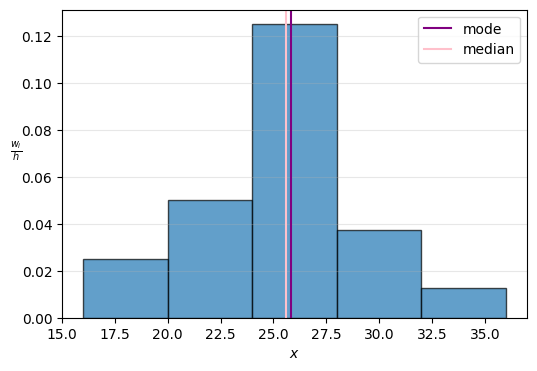

In [411]:
df['rel_freq'] = df['n'] / (n * (df['right_border'] - df['left_border']))
plt.figure(figsize=(6,4))
plt.grid(axis='y', alpha=0.3)
plt.bar(df.left_border, df['rel_freq'], width=h, align='edge', edgecolor='black', alpha=0.7)
plt.axvline(mode, color='purple', label='mode')
plt.axvline(median, color='pink', label='median')
plt.xlabel(r'$x$')
plt.ylabel(r'$\frac{w_i}{h}$', rotation=0)
plt.legend()
plt.show()

## Paragraph 5. Measures of Variation. Population and Sample Variance

Range $R = x_{max} - x_{min}$

In [413]:
data = [15, 17, 13, 10, 21, 17, 23, 9, 14, 19]
r = max(data) - min(data)
r

14

Deviation from the mean

$$
x_i - \bar{x}
$$

Mean Absolute Deviation (Mean Linear Deviation)

$$
\bar{l} = \frac{\sum_{i=1}^n \left|x_i - \bar{x}\right|}{n}
$$

or for grouped data
$$
\bar{l} = \frac{\sum_{i=1}^k \left|x_i - \bar{x}\right|n_i}{n}
$$

where $x_i$ - variants, or middle of intervals and $n_i$ - frequency

Example 13: find the mean abs deviation

In [421]:
s = np.array([7.1, 6.3, 6.2, 5.8, 7.7, 6.8, 6.7, 5.9, 5.7, 5.1])
mean_s = sum(s) / len(s)
mean_s

np.float64(6.33)

In [426]:
dev_mean = abs(s - mean_s)
dev_mean

array([0.77, 0.03, 0.13, 0.53, 1.37, 0.47, 0.37, 0.43, 0.63, 1.23])

In [430]:
mean_abs_dev = sum(dev_mean) / len(s)
mean_abs_dev

np.float64(0.596)

Sample Variance

$$
D_e = \frac{\sum_{i=1}^n \left(x_i-\bar{x_e} \right)^2}{n}
$$

$$
D_e = \frac{\sum_{i=1}^k \left(x_i-\bar{x_e} \right)^2 n_i}{n}
$$

squares of deviations from the mean

In [434]:
sq_dev_mean = (s - mean_s)**2
print(sq_dev_mean)

[5.9290e-01 9.0000e-04 1.6900e-02 2.8090e-01 1.8769e+00 2.2090e-01
 1.3690e-01 1.8490e-01 3.9690e-01 1.5129e+00]


In [436]:
variance = sum(sq_dev_mean) / len(s)
variance

np.float64(0.5221000000000001)

Unbiased variance $s^2$:

$$
s^2 = \frac{n}{n-1} D_e 
$$


In [437]:
unb_variance = len(s)*variance / (len(s) - 1)
unb_variance

np.float64(0.5801111111111112)

Example 14

In [438]:
data = {
    "duration": [0, 1, 2, 3, 4, 5],
    "quantity":[8, 18, 11, 7, 4, 2]
}
df = pd.DataFrame(data)

In [439]:
df

,duration,quantity
0,0,8
1,1,18
2,2,11
3,3,7
4,4,4
5,5,2


Range

In [443]:
R = max(df.quantity) - min(df.quantity)
R

16

Mean Absolute Deviation MAD
$$
\bar{l} = \frac{\sum_{i=1}^k \left|x_i - \bar{x}\right|n_i}{n}
$$

In [450]:
n = sum(df.quantity)
mean = sum(df.duration * df.quantity) / n
mad = sum(abs(df.duration - mean)*df.quantity) / n
mad

1.0896

Sample variance
$$
D_e = \frac{\sum_{i=1}^k \left(x_i-\bar{x_e} \right)^2 n_i}{n}
$$

In [453]:
variance = sum((df.duration - mean)**2*df.quantity) / n
variance

1.7523999999999997

Unbiased sample variance $s^2$:

In [455]:
unb_var = variance * n / (n-1)
unb_var

1.7881632653061224

## Paragraph 6. Variance. Standard deviation. Coefficient of variation.

Formula for the variance calculation:

$$
D = \bar{x^2} - \bar{x}^2
$$

For the raw data:

$$
D_e = \frac{\sum_{i=1}^n x_i^2}{n} - \left( \frac{\sum_{i=1}^n x_i}{n} \right)^2
$$

For the grouped data:

$$
D_e = \frac{\sum_{i=1}^n x_i^2 n_i}{n} - \left( \frac{\sum_{i=1}^n x_i n_i}{n} \right)^2
$$

Example 15

In [465]:
s = np.array([7.1, 6.3, 6.2, 5.8, 7.7, 6.8, 6.7, 5.9, 5.7, 5.1])
n = len(s)
mean_s = sum(s) / n
mean_s

np.float64(6.33)

In [466]:
s_sq = s**2
s_sq

array([50.41, 39.69, 38.44, 33.64, 59.29, 46.24, 44.89, 34.81, 32.49,
       26.01])

In [468]:
variance = (sum(s_sq) / n) - (sum(s) / n)**2
variance

np.float64(0.5221000000000018)

Example 16

In [11]:
data = {
    "left": [200, 400, 600, 800, 1000],
    "right": [400, 600, 800, 1000, 1200],
    "quantity":[32, 56, 120, 104, 88]
}
df = pd.DataFrame(data)
n = df.quantity.sum()

df['mid'] = (df['right'] + df['left']) / 2
df['xn'] = df['mid'] * df['quantity']
df['x2n'] = df['mid']**2 * df['quantity']

In [12]:
df

,left,right,quantity,mid,xn,x2n
0,200,400,32,300.0,9600.0,2880000.0
1,400,600,56,500.0,28000.0,14000000.0
2,600,800,120,700.0,84000.0,58800000.0
3,800,1000,104,900.0,93600.0,84240000.0
4,1000,1200,88,1100.0,96800.0,106480000.0


In [21]:
mean = df.xn.sum() / n
variance = df.x2n.sum() / n - mean ** 2
sd = math.sqrt(variance)

In [22]:
print(f'Mean: {mean}\nVariance: {variance}\nStandart deviation: {sd}')

Mean: 780.0
Variance: 57600.0
Standart deviation: 240.0


In [30]:
s2 = n * variance / (n - 1)
s = math.sqrt(s2)

In [33]:
print(f'Unbiased variance: {s2}\nUnbiased standart deviation: {s}')

Unbiased variance: 57744.36090225564
Unbiased standart deviation: 240.30056367444425


Сoefficient of variation

$$
CV (\%) = \frac{sd}{\bar{x}} 100 \%
$$

In [91]:
cv = sd * 100 / mean
print(f'{round(cv, 2)} %')

138.42 %


Example 17

a.

$sd = 5$, $\bar{ x^2}$ = 250, find $\bar{x}$

$D = \bar{x^2} - \bar{x}^2$


In [44]:
sd = 5
x2_mean = 250
x_mean = math.sqrt(x2_mean-sd**2)
x_mean

15.0

b.

find sd, if $\bar{x} = 260$ and $CV = 30 \%$

In [47]:
cv = 30
x_mean = 260

sd = cv * x_mean / 100
sd

78.0

Example 18

find $\bar{x}$, $sd$, $CV$

In [78]:
data = {
    "month": ['jan', 'feb', 'mar', 'apr', 'may', 'june'],
    "quantity":[263, 284, 310, 296, 288, 251]
}
df = pd.DataFrame(data)
n = len(df)
sum_x = df.quantity.sum()

df['quantity2'] = df.quantity**2

In [90]:
df

,month,quantity,quantity2
0,jan,263,69169
1,feb,284,80656
2,mar,310,96100
3,apr,296,87616
4,may,288,82944
5,june,251,63001


In [95]:
mean = sum_x / n
var = df.quantity2.sum() / n - mean**2
sd = math.sqrt(var)
cv = sd * 100 / mean

In [98]:
print(f'Mean: {mean}\nStandart deviation: {sd}\nСoefficient of variation: {round(cv, 2)} %')

Mean: 282.0
Standart deviation: 19.756855350316467
Сoefficient of variation: 7.01 %


### Paragraph 7. Skewness and Kurtosis of an Empirical Distribution

skewness coefficient formula

Pearson's First Coefficient:

$$
\frac{\bar{x} - M_0}{\sigma}
$$

$\sigma$ - standart deviation, $M_0$ - mode, $\bar{x}$ - mean

Pearson's Second Coefficient:

$$
\frac{3(\bar{x} - M_d)}{\sigma}
$$

$M_d$ - median

more advanced formula:

$$
\frac{\mu_3}{\sigma^3}
$$

$\mu_3$ - the third central moment, 

$$
\mu_3 = \frac{\sum_{i=1}^n(x_i - \bar{x})^3}{n} 
$$
or 

$$
\mu_3 = \frac{\sum_{i=1}^k(x_i - \bar{x})^3 n_i}{n} 
$$

Kurtosis formula:

$$
\frac{\mu_4}{\sigma^4} - 3
$$

$\mu_4$ - the fourth central moment

$$
\mu_4 = \frac{\sum_{i=1}^n(x_i - \bar{x})^4}{n} 
$$
or 

$$
\mu_4 = \frac{\sum_{i=1}^k(x_i - \bar{x})^4 n_i}{n} 
$$

Example 19

In [124]:
data = {
    "left":[48, 49, 50, 51],
    "right": [49, 50, 51, 52], 
    "quantity": [20, 50, 20, 10]
}

df = pd.DataFrame(data)


df['h'] = df['right'] - df['left']
df['mid'] = (df['right'] + df['left']) / 2
n = df.quantity.sum()
df['w'] = df['quantity'] / n
df['density'] = df['w']/df['h']
df['w_cum'] = df.w.cumsum()


In [125]:
df

,left,right,quantity,h,mid,w,density,w_cum
0,48,49,20,1,48.5,0.2,0.2,0.2
1,49,50,50,1,49.5,0.5,0.5,0.7
2,50,51,20,1,50.5,0.2,0.2,0.9
3,51,52,10,1,51.5,0.1,0.1,1.0


In [126]:
n = sum(df.quantity)
df['x_n'] = df.mid * df.quantity
mean = df['x_n'].sum() / n

In [148]:
mean

np.float64(49.7)

In [127]:
df['dif2'] = df.quantity*(df.mid - mean)**2
df['dif3'] = df.quantity*(df.mid - mean)**3
df['dif4'] = df.quantity*(df.mid - mean)**4

In [132]:
variance = df.dif2.sum() / n
sd = math.sqrt(variance)
m3 = df.dif3.sum() / n
m4 = df.dif4.sum() / n

In [145]:
print(m3, m4)

0.3359999999999935 1.5471999999999964


In [146]:
skew = m3 / sd**3
kur = m4 / sd**4 - 3

In [147]:
print(f"""Variance: {variance}
Standart deviation: {round(sd, 2)}
Skewness: {round(skew, 2)}
Kurtosis: {round(kur, 2)}""")




Variance: 0.76
Standart deviation: 0.87
Skewness: 0.51
Kurtosis: -0.32


the distribution has positive skew (right-sided asymmetry) - skewness = 0.51 > 0

kurtosis = -0.32 < 0, that means distribution is lower than normal distribution with parameters 
$a = \bar{x} = 49.7$, $sd = \sigma = 0.87$

Example 20

1) split the data into k = 9 intervals
2) plot histogram, ECDF
3) find median, mode
4) find mean, variance, standart deviation, coefficient of variation (cv = sd * 100 / mean)
5) find skewness and curtosis

In [193]:
raw = """17,1	21,4	15,9	19,1	22,4	20,7	17,9	18,6	21,8	16,1
19,1	20,5	14,2	16,9	17,8	18,1	19,1	15,8	18,8	17,2
16,2	17,3	22,5	19,9	21,1	15,1	17,7	19,8	14,9	20,5
17,5	19,2	18,5	15,7	14	18,6	21,2	16,8	19,3	17,8
18,8	14,3	17,1	19,5	16,3	20,3	17,9	23	17,2	15,2
15,6	17,4	21,3	22,1	20,1	14,5	19,3	18,4	16,7	18,2
16,4	18,7	14,3	18,2	19,1	15,3	21,5	17,2	22,6	20,4
22,8	17,5	20,2	15,5	21,6	18,1	20,5	14	18,9	16,5
20,8	16,6	18,3	21,7	17,4	23	21,1	19,8	15,4	18,1
18,9	14,7	19,5	20,9	15,8	20,2	21,8	18,2	21,2	20,1"""

k = 9

In [194]:
raw = raw.replace(',', '.')
data = []
for line in raw.split('\n'):
    data += list(map(lambda x: float(x), line.split('\t')))

In [200]:
n = len(data)

#range
r = max(data) - min(data)

#length of each interval
h = r / k

In [208]:
inter = []
value = min(data)
for i in range(9):
    inter.append(value)
    value += h

df = pd.DataFrame(inter, columns=['left'])
df['right'] = df['left'] + h

In [299]:
srt = sorted(data)
df['n'] = 0
k = 0
c = 0
for i in range(9):
    for j in range(k, len(srt)):
        
        left = df.loc[i, 'left']
        right = df.loc[i, 'right']
        cnt = 0
        if left <= srt[j] < right:
            df.loc[i, 'n'] += 1
        else:
            break
        c+=1
    k=c
            

df.loc[df.index[-1], 'n'] = (df.iloc[-1]['n'] + (len(data) - df.n.sum()))
            
vol = len(data)
df['rel_freq'] = df['n'] / vol
df['sum_rel_freq'] = df.rel_freq.cumsum()    
df['cumsum'] = df.n.cumsum()

In [300]:
df

,left,right,n,rel_freq,sum_rel_freq,cumsum
0,14.0,15.0,8,0.08,0.08,8
1,15.0,16.0,10,0.10,0.18,18
2,16.0,17.0,9,0.09,0.27,27
3,17.0,18.0,15,0.15,0.42,42
4,18.0,19.0,16,0.16,0.58,58
5,19.0,20.0,12,0.12,0.70,70
6,20.0,21.0,12,0.12,0.82,82
7,21.0,22.0,11,0.11,0.93,93
8,22.0,23.0,7,0.07,1.00,100


Hist

<BarContainer object of 9 artists>

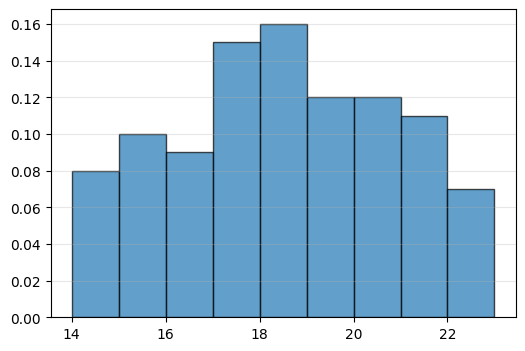

In [274]:
plt.figure(figsize=(6,4))
plt.grid(axis='y', alpha=0.3)
plt.bar(df['left'], df['rel_freq'], width=h, align='edge', edgecolor='black', alpha=0.7)

Empirical Distribution Function

In [291]:
plot_data_x = np.array(df.right)
plot_data_x = np.concatenate([[df.left[0] - 2*h], [df.left[0]], plot_data_x, [df.iloc[-1]['right'] + 2*h]])

plot_data_y = np.array(df.sum_rel_freq)
plot_data_y = np.concatenate([[0], [0], plot_data_y, [1]])

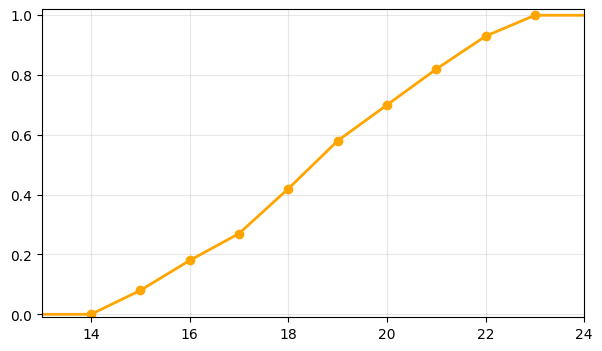

In [293]:
plt.figure(figsize=(7,4))
plt.plot(plot_data_x, plot_data_y, marker='o', linewidth=2, color='orange')
plt.grid(True, alpha=0.3)
plt.ylim(-0.01, 1.02)
plt.xlim(df.left[0] - h, df.iloc[-1]['right'] + h)
plt.show()

Mode and median

In [296]:
# modal class interval
modal_interval = df[df.n==df.n.max()]
h = (modal_interval['right'] - modal_interval['left']).iloc[0]
freq = modal_interval.n.iloc[0]

x0 = modal_interval.left.iloc[0]
freq_next = df.at[modal_interval.index[0] + 1, 'n']
freq_prev = df.at[modal_interval.index[0] - 1, 'n']

mode = x0 + (freq - freq_prev)*h / ((freq - freq_prev) + (freq - freq_next))
mode

np.float64(18.2)

In [306]:
half_volume = vol // 2
median_interval = df[df['cumsum']>=half_volume+1].head(1)
n = sum(df.n)
h = (median_interval['right'] - median_interval['left']).iloc[0]
x0 = median_interval.left.iloc[0]
freq = median_interval.n.iloc[0]
freq_prev = df.at[median_interval.index[0] - 1, 'cumsum']
median = x0 + (0.5*n-freq_prev)*h/freq
median

np.float64(18.5)

In [312]:
df['mid'] = (df.left + df.right) / 2
df['xn'] = df.mid * df.n
mean = df.xn.sum()/vol
df['dif2'] = df.n*(df.mid - mean)**2
df['dif3'] = df.n*(df.mid - mean)**3
df['dif4'] = df.n*(df.mid - mean)**4

In [332]:
variance = df.dif2.sum() / vol
sd = math.sqrt(variance)
cv = (sd / mean) * 100
#unb_variance = vol*variance / (vol - 1)

In [333]:
m3 = df.dif3.sum() / vol
m4 = df.dif4.sum() / vol
skewness = m3 / sd**3
kurtosis = m4 / sd**4 - 3

In [341]:
print(f"""
Median: {median}
Mode: {mode}
Variance: {round(variance, 2)}
Mean: {round(mean, 2)}
Standart deviation: {round(sd, 2)}
Coefficient of variation: {round(cv, 2)}
Skewness: {round(skewness, 2)}
Kurtosis: {round(kurtosis, 2)}
""")


Median: 18.5
Mode: 18.2
Variance: 5.4
Mean: 18.52
Standart deviation: 2.32
Coefficient of variation: 12.55
Skewness: -0.04
Kurtosis: -0.97



Thus, the sample population is almost symmetrical, but somewhat lower than the normal distribution with parameters $a = 18.52$, $\sigma = 2.32$

## Paragraph 8. Statistical Estimation of Population Parameters. Confidence Interval and Confidence Level.



We require that the sample estimate $\hat{\theta}$ (e.g. mean, variance, etc.) should not deviate from the true parameter $\theta$ by more than some positive value $\delta$

This value $\delta$ is called the accuracy (or precision) of the estimate.

We can only say that this condition holds with some probability $\gamma$

$$
P\left( \left| \theta - \hat{\theta} \right| \right) < \delta) = \gamma
$$

By expanding the absolute value, we obtain the interval:
$$
\theta \in \left( \hat{\theta} - \delta; \hat{\theta} + \delta \right)
$$

This interval is called a _confidence interval_. It represents an interval estimate of the unknown parameter $\theta$

The probability $\gamma$ is called the _confidence level_ (or reliability) of the interval estimate.

<ins> Example 21 </ins>

It is known that the population is normally distributed with a standard deviation of $\sigma = 5$

Find the confidence interval for estimating the population mean $a$ with a confidence level of 0.95, given that the sample mean is $\bar{x}=24.15$ and the sample size is $n = 100$


In [342]:
sigma = 5
mean = 24.15
n = 100
gamma = 0.95

accuracy:
$$
\delta = \frac{t_{\gamma}\sigma}{\sqrt{n}}
$$

$t_{\gamma}$ - confidence value (z-value in case of normal distribution and standard normal CDF)

$2\Phi(t_{\gamma})=\gamma$, where $\Phi(x)$ is the standard normal CDF.

Solving the problem:

$2\Phi(t_{\gamma})=0.95$

$\Phi(t_{\gamma})=0.475$

$t_{\gamma} \approx 1.96$ 

In [345]:
#norm.ppf() — percent point function

from scipy.stats import norm

gamma = 0.95
p = (gamma + 1) / 2  

t = norm.ppf(p)
print(t)

1.959963984540054


In [347]:
delta = t * sigma / math.sqrt(n)
delta

np.float64(0.9799819922700269)

confidence interval:

In [353]:
print(f"{round(mean - delta, 2)} < a < {round(mean + delta, 2)}")

23.17 < a < 25.13


This interval covers the true population mean with probability 0.95 (the confidence level).
However, there still remains a 5% chance that the true population mean lies outside the interval.

<ins> Example 22 </ins>

Based on the results of a sample survey of $n = 100$ objects, the sample mean was found to be $\bar{x} = 93$

1) With what probability can we state that the population mean differs from this sample mean by less than 3, given that the population is normally distributed with a variance of 400?

2) Determine the confidence interval that will contain the true population mean with a confidence level of $\gamma = 0.99$

In [391]:
n = 100
mean = 93
delta = 3
variance = 400


In [392]:
# 1)
# population sd
sigma = math.sqrt(variance)

#confidence value
t = delta * math.sqrt(n) / sigma

#probability
gamma = 2*(norm.cdf(t)-0.5)
print("probability", round(gamma, 2))

probability 0.87


In [393]:
# 2)
gamma = 0.99
lapl = gamma / 2
p = (gamma + 1) / 2  

t = norm.ppf(p)
delta = t*sigma / math.sqrt(n)
print(round(delta, 2))

5.15


In [394]:
print(f"{mean} - {round(delta, 2)} < a < {mean} + {round(delta, 2)}")
print(f"{mean - round(delta, 2)} < a < {mean + round(delta, 2)}")

93 - 5.15 < a < 93 + 5.15
87.85 < a < 98.15


<ins> Example 23 </ins>

Given the 10 independent measurements of X.
Assuming the measurement results are normally distributed, estimate the true value of X by constructing a confidence interval that contains the true value with a confidence level of 0.95.

In [401]:
data = np.array([7.1, 6.3, 6.2, 5.8, 7.7, 6.8, 6.7, 5.9, 5.7, 5.1])

np.float64(0.5221000000000001)

In [408]:
n = len(data)
mean = sum(data) / n
var = sum((data - mean)**2) / n
unb_var = var * n / (n - 1)
s = math.sqrt(unb_var)
print(mean, round(var, 3), round(unb_var, 3), round(s, 3))

6.33 0.522 0.58 0.762


Confidence interval

$$
\bar{x} - \frac{t_{\gamma}s}{\sqrt{n}} < a < \bar{x} + \frac{t_{\gamma}s}{\sqrt{n}}
$$

$t_{\gamma}$ from t-distribution

In [418]:
from scipy.stats import t
gamma = 0.95
p = (gamma + 1) / 2  

t_g = t.ppf(p, n-1)
t_g

np.float64(2.262157162854099)

accuracy:

In [420]:
delta = t_g*s / math.sqrt(n)
delta

np.float64(0.5448517699416507)

In [421]:
print(f"{mean} - {round(delta, 2)} < a < {mean} + {round(delta, 2)}")
print(f"{mean - round(delta, 2)} < a < {mean + round(delta, 2)}")

6.33 - 0.54 < a < 6.33 + 0.54
5.79 < a < 6.87


This interval covers the true value $a$ of value X with $\gamma = 0.95$ probability

<ins> Example 24 </ins>

Based on the results of $n = 20$ trials, it was found that the average time is 76 seconds, and the corrected sample standard deviation is 11 seconds.
Assuming that X is a normally distributed random variable, determine the confidence interval for the mean time with a confidence level of 0.999.

In [422]:
n = 20
mean = 76
s = 11
gamma = 0.999

In [424]:
p = (gamma + 1) / 2  

t_g = t.ppf(p, n - 1)
delta = t_g*s / math.sqrt(n)
delta

np.float64(9.551915417678186)

In [425]:
print(f"{mean} - {round(delta, 2)} < a < {mean} + {round(delta, 2)}")
print(f"{mean - round(delta, 2)} < a < {mean + round(delta, 2)}")

76 - 9.55 < a < 76 + 9.55
66.45 < a < 85.55


<ins> Example 25 </ins>

Based on the results of $n = 10$ trials, it was found that the corrected sample standard deviation is $s = 0.76$ seconds.
Assuming that X is a normally distributed random variable, determine the confidence interval for the true value of standart deviation $\sigma$ with a confidence level of $\gamma = 0.95$.

In [436]:
n = 10
s = 0.76
gamma = 0.95

The confidence interval of $\sigma^2$:

$$
\frac{(n-1)s^2}{\chi_{\alpha_{1},k}^2} < \sigma^2 < \frac{(n-1)s^2}{\chi_{\alpha_{2},k}^2}
$$

$\chi^2$ - Chi-squared distribution

$\alpha_1 = \frac{1 - \gamma}{2}$

$\alpha_2 = \frac{1 + \gamma}{2}$

$k = n - 1$


The confidence interval of $\sigma$:

$$
\frac{\sqrt{(n-1)}s}{\chi_{\alpha_{1},k}} < \sigma< \frac{\sqrt{(n-1)}s}{\chi_{\alpha_{2},k}}
$$


find the $\alpha$ for the example 25:

In [441]:
a1 = (1 - gamma) / 2
a2 = (1 + gamma) / 2
k = n - 1
#p = (gamma + 1) / 2  

chi1 = scipy.stats.chi2.ppf(a1, k)
chi2 = scipy.stats.chi2.ppf(a2, k)
print(chi1, chi2)

2.7003894999803584 19.02276779864163


In [439]:
left = math.sqrt(k) * s / math.sqrt(chi2)
right = math.sqrt(k) * s / math.sqrt(chi1)

In [440]:
print(f"{round(left, 2)} < sigma < {round(right, 2)}")


0.52 < sigma < 1.39


The other way to find the confidence interval:

$$
s(1-q) < \sigma < s(1+q)
$$

$q$ can be found in the special table

In [443]:
q = 0.65
left1 = s*(1-q)
right1 = s*(1+q)

print(f"{round(left1, 2)} < sigma < {round(right1, 2)}")

0.27 < sigma < 1.25


<ins> Example 25 </ins>

Given $n = 100$, $\bar{x}=18.52$, $sd = 2.3237$, $\gamma = 0.9$

Find the confidence intercals for 
1) Unknown population mean $\bar{x}$
2) Population sd $\sigma$ a) with chi-squared

$$
\frac{\sqrt{(n-1)}s}{\chi_{\alpha_{1},k}} < \sigma< \frac{\sqrt{(n-1)}s}{\chi_{\alpha_{2},k}}
$$

and b) with approximate formula:

$$
\frac{\sqrt{2n}}{\sqrt{2n-3}+t_{\gamma}}s < \sigma < \frac{\sqrt{2n}}{\sqrt{2n-3}-t_{\gamma}}s
$$

In [444]:
n = 100
mean = 18.52
sd = 2.3237
gamma = 0.9

In [450]:
# 1
s = math.sqrt(n / (n - 1)) * sd

p = (gamma + 1) / 2  
t_g = t.ppf(p, n - 1)
delta = t_g*s / math.sqrt(n)
print(f"{mean} - {round(delta, 2)} < a < {mean} + {round(delta, 2)}")
print(f"{mean - round(delta, 2)} < a < {mean + round(delta, 2)}")

18.52 - 0.39 < a < 18.52 + 0.39
18.13 < a < 18.91


In [451]:
# a 
a1 = (1 - gamma) / 2
a2 = (1 + gamma) / 2
k = n - 1

chi1 = scipy.stats.chi2.ppf(a1, k)
chi2 = scipy.stats.chi2.ppf(a2, k)
print(chi1, chi2)

77.04633186376029 123.2252214533618


In [453]:
left = math.sqrt(k) * s / math.sqrt(chi2)
right = math.sqrt(k) * s / math.sqrt(chi1)
print(f"{round(left, 2)} < sigma < {round(right, 2)}")

2.09 < sigma < 2.65


In [458]:
# b 
t_g = norm.ppf(p)
left1 = math.sqrt(2*n)*s / (math.sqrt(2*n - 3) - t_g)
right1 = math.sqrt(2*n)*s / (math.sqrt(2*n - 3) + t_g)

print(f"{round(right1, 2)} < sigma < {round(left1, 2)}")

2.11 < sigma < 2.67


### chi-square distribution and its quantiles


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

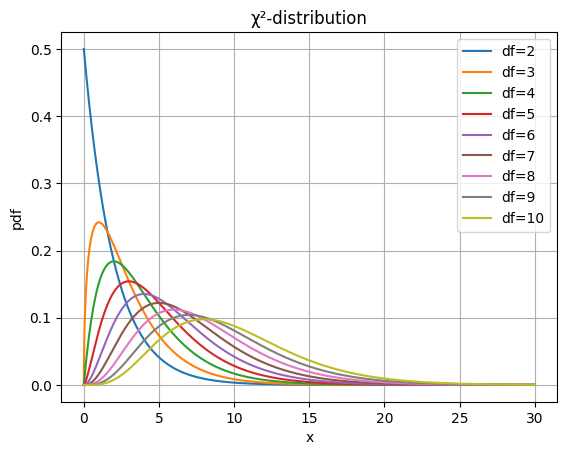

In [69]:
for i in range(2, 11):
    x = np.linspace(0, 30, 1000)
    y = chi2.pdf(x, i)
    plt.plot(x, y, label=f'df={i}')
    plt.xlabel("x")
    plt.ylabel("pdf")
    plt.title(f"χ²-distribution")
    plt.legend()
plt.grid()
plt.show()


In [96]:
def plot_chi2(df, gamma=0.99):
    ylim = 200
    x = np.linspace(0, ylim, 1000)
    y = chi2.pdf(x, df)

    alpha = 1 - gamma
    chi2_left = chi2.ppf(alpha/2, df)
    chi2_right = chi2.ppf(1 - alpha/2, df)
    
    plt.plot(x, y, label=f'df={df}')
    plt.axvline(chi2_left, color='coral', label='quantile')
    plt.axvline(chi2_right, color='coral')
    
    plt.xlabel("x")
    plt.ylabel("pdf")
    
    plt.title(f"χ²-distribution")
    plt.legend()
    plt.xlim([0, ylim])
    plt.grid()
    plt.show()

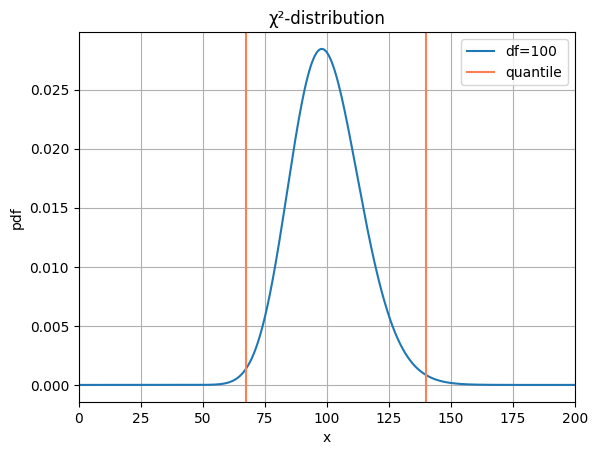

In [97]:
plot_chi2(100)

In [94]:
def plot_chi2_left(df, ylim = 200, gamma=0.99):
    x = np.linspace(0, ylim, 1000)
    y = chi2.pdf(x, df)

    alpha = 1 - gamma
    chi2_left = chi2.ppf(alpha/2, df)
    
    plt.plot(x, y, label=f'df={df}')
    plt.axvline(chi2_left, color='coral')
    plt.fill_between(x, y, where=(x <= chi2_left), alpha=0.3, color='coral')
    
    plt.xlabel("x")
    plt.ylabel("pdf")
    
    plt.title(f"χ²-distribution left quantile,  alpha={round(alpha, 3)}, p={round(alpha/2, 3)}")
    plt.legend()
    plt.xlim([0, ylim])
    plt.grid()
    plt.show()
def plot_chi2_right(df, ylim = 200, gamma=0.99):
    x = np.linspace(0, ylim, 1000)
    y = chi2.pdf(x, df)

    alpha = 1 - gamma
    chi2_right = chi2.ppf(1 - alpha/2, df)
    
    plt.plot(x, y, label=f'df={df}')
    plt.axvline(chi2_right, color='coral')
    plt.fill_between(x, y, where=(x <= chi2_right), alpha=0.3, color='coral')
    
    plt.xlabel("x")
    plt.ylabel("pdf")
    
    plt.title(f"χ²-distribution right quantile, alpha={round(alpha, 3)}, p={round(1 - alpha/2, 3)}")
    plt.legend()
    plt.xlim([0, ylim])
    plt.grid()
    plt.show()

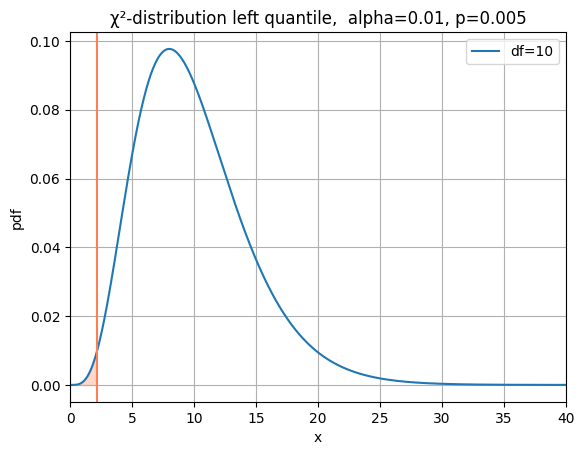

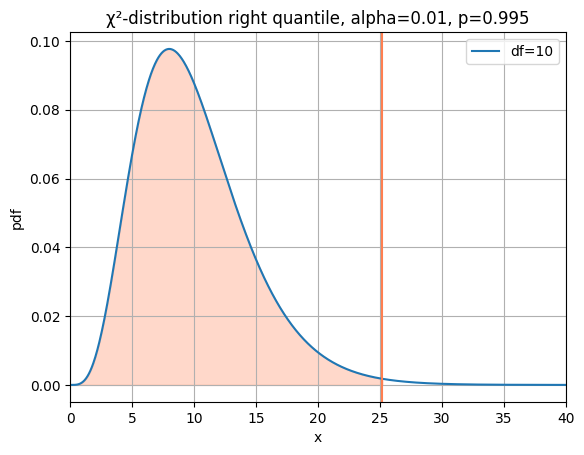

In [95]:
plot_chi2_left(10, 40)
plot_chi2_right(10, 40)

In [106]:
import math

## Paragraph 9. Estimating the Probability of a Binomial Distribution

$$
p_1 < p < p_2
$$

$$
p_1 = \frac{n}{t^2+n} \left[ w + \frac{t^2}{2n} - t \sqrt{\frac{w(1-w)}{n} + \left( \frac{t}{2n} \right)^2} \right]
$$

$$
p_2 = \frac{n}{t^2+n} \left[ w + \frac{t^2}{2n} + t \sqrt{\frac{w(1-w)}{n} + \left( \frac{t}{2n} \right)^2} \right]
$$


In [100]:
n = 300
m = 75
t = 1.96
w = m/n

In [115]:
p1 = (n / (t**2 + n))*(w + t**2 / (2*n) - t * math.sqrt(w*(1-w)/n + (t/(2*n))**2))
p2 = (n / (t**2 + n))*(w + t**2 / (2*n) + t * math.sqrt(w*(1-w)/n + (t/(2*n))**2))

print(f'{round(p1, 3)} < p < {round(p2, 3)}')

0.2044 < p < 0.302



approximate values with n > 100

$$
p_1 = w - t \sqrt{ \frac{w(1-w)}{n}}
$$

$$
p_2 = w + t \sqrt{\frac{w(1-w)}{n}}
$$

In [118]:
p1_simple = w - t*math.sqrt(w*(1-w)/n)
p2_simple = w + t*math.sqrt(w*(1-w)/n)

print(f'{round(p1_simple, 3)} < p < {round(p2_simple, 3)}')

0.201 < p < 0.299


Example 28

a.

In [130]:
n = 500
m = 200
w = m/n
delta = 0.03
t = delta/math.sqrt((1 - w)*w/n)
t

1.3693063937629153

In [132]:
gamma = 2*(norm.cdf(t)-0.5)
gamma

np.float64(0.8290964797692024)

b.

In [141]:
n = 500
m = 200
w = m/n
delta = 0.05
t = delta/math.sqrt((1 - w)*w/n)
print(t)
gamma1 = (norm.cdf(t)-0.5)
print(gamma1)

2.282177322938192
0.4887605633169374


In [140]:
n = 500
m = 200
w = m/n
delta = 0.1
t = delta/math.sqrt((1 - w)*w/n)
print(t)
gamma2 = (norm.cdf(t)-0.5)
print(gamma2)

4.564354645876384
0.4999974948340218


In [145]:
gamma1+gamma2

np.float64(0.9887580581509592)

Example 29

In [158]:
n = 1000
m = 300
w = m/n
delta=0.01


gamma = 0.95
p = gamma/2 + 0.5 # why this value ?

t = norm.ppf(p)
t

np.float64(1.959963984540054)

In [159]:
n_new = t**2 * w * (1-w) / delta**2

In [160]:
n_new

np.float64(8067.063523457662)